In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

df = pd.read_csv("Placement_BeginnerTask01.csv") 
df.head()

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,1,7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced
1,2,8.9,0,3,2,90,4.0,Yes,Yes,78,82,Placed
2,3,7.3,1,2,2,82,4.8,Yes,No,79,80,NotPlaced
3,4,7.5,1,1,2,85,4.4,Yes,Yes,81,80,Placed
4,5,8.3,1,2,2,86,4.5,Yes,Yes,74,88,Placed


In [9]:
# The data set is now loaded. Each row represents one student.
# Performing EDA on the data to analyze trends and patterns.
print(df.head(),"\n")
print(df.shape)
df.columns

   StudentID  CGPA  Internships  Projects  Workshops/Certifications  \
0          1   7.5            1         1                         1   
1          2   8.9            0         3                         2   
2          3   7.3            1         2                         2   
3          4   7.5            1         1                         2   
4          5   8.3            1         2                         2   

   AptitudeTestScore  SoftSkillsRating ExtracurricularActivities  \
0                 65               4.4                        No   
1                 90               4.0                       Yes   
2                 82               4.8                       Yes   
3                 85               4.4                       Yes   
4                 86               4.5                       Yes   

  PlacementTraining  SSC_Marks  HSC_Marks PlacementStatus  
0                No         61         79       NotPlaced  
1               Yes         78         82   

Index(['StudentID', 'CGPA', 'Internships', 'Projects',
       'Workshops/Certifications', 'AptitudeTestScore', 'SoftSkillsRating',
       'ExtracurricularActivities', 'PlacementTraining', 'SSC_Marks',
       'HSC_Marks', 'PlacementStatus'],
      dtype='object')

In [ ]:
# Observe no non-null values and accurate type-matching indicating that data given is valid.
print(df.isnull().sum(),"\n")
df.info()

StudentID                    0
CGPA                         0
Internships                  0
Projects                     0
Workshops/Certifications     0
AptitudeTestScore            0
SoftSkillsRating             0
ExtracurricularActivities    0
PlacementTraining            0
SSC_Marks                    0
HSC_Marks                    0
PlacementStatus              0
dtype: int64 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StudentID                  10000 non-null  int64  
 1   CGPA                       10000 non-null  float64
 2   Internships                10000 non-null  int64  
 3   Projects                   10000 non-null  int64  
 4   Workshops/Certifications   10000 non-null  int64  
 5   AptitudeTestScore          10000 non-null  int64  
 6   SoftSkillsRating           10000 non-null  float64
 

In [14]:
df.describe()

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,SSC_Marks,HSC_Marks
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,7.698010,1.049200,2.026600,1.013200,79.449900,4.323960,69.159400,74.501500
std,2886.89568,0.640131,0.665901,0.867968,0.904272,8.159997,0.411622,10.430459,8.919527
min,1.00000,6.500000,0.000000,0.000000,0.000000,60.000000,3.000000,55.000000,57.000000
25%,2500.75000,7.400000,1.000000,1.000000,0.000000,73.000000,4.000000,59.000000,67.000000
50%,5000.50000,7.700000,1.000000,2.000000,1.000000,80.000000,4.400000,70.000000,73.000000
75%,7500.25000,8.200000,1.000000,3.000000,2.000000,87.000000,4.700000,78.000000,83.000000
max,10000.00000,9.100000,2.000000,3.000000,3.000000,90.000000,4.800000,90.000000,88.000000


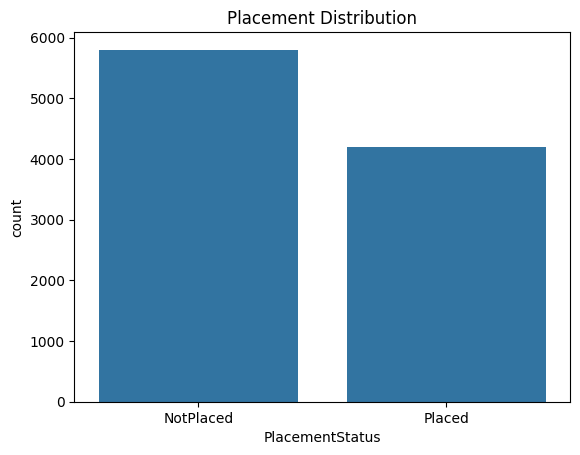

In [20]:
sns.countplot(x='PlacementStatus', data=df)
plt.title("Placement Distribution")
plt.show()

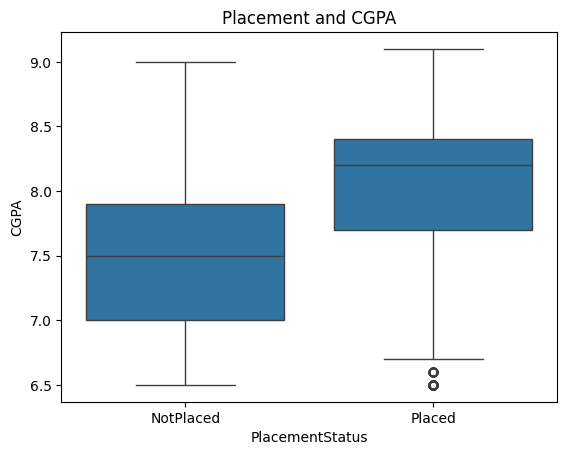

In [34]:
sns.boxplot(x='PlacementStatus', y='CGPA', data=df)
plt.title("Placement and CGPA")
plt.show()

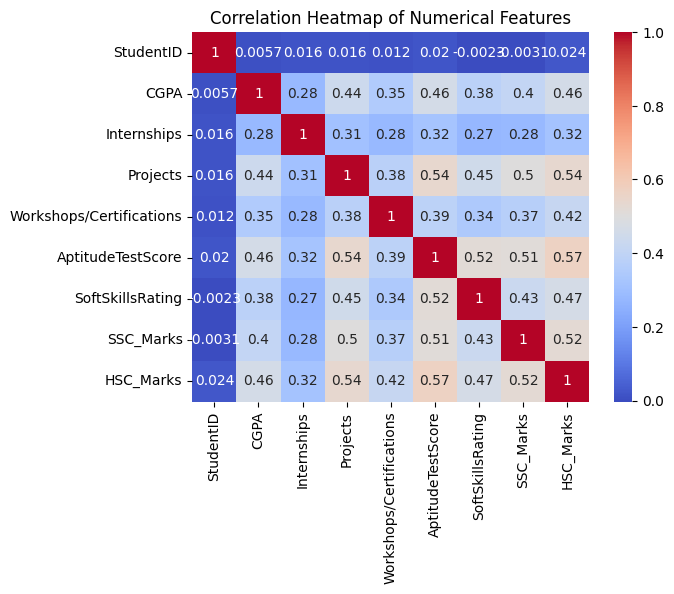

In [ ]:
numeric_df = df.select_dtypes(include='number')
corr=numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

# RESULTS OF EDA
# This dataset contains 10000 rows and 12 columns
# There is a higher amount of NonPlaced students as compared to Placed students
# Placed Students have a higher median CGPA than the NotPlaced Students but are also marked with interesting outliers of low CGPA (~ 6.5)

In [ ]:
# Beginning training
# Changing all values to numeric

y = df['PlacementStatus']
X = df.drop(['StudentID', 'PlacementStatus'], axis=1)
X = pd.get_dummies(X, drop_first=True, dtype=int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)



In [ ]:
# As this is a YES/NO model, using LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [ ]:
print(model.coef_)
print(model.intercept_)

# To analyze weights and bias.

[[ 0.35776301 -0.00410031  0.27398519  0.12162997  0.06827479  0.76299573
   0.02899749  0.02558411  0.77808343  0.90464704]]
[-17.7940542]


In [60]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.808

In [ ]:
# An accuracy of 0.808 with above constraints.
# Demo on a random data item.

idx = np.random.randint(0, len(X_test))

sample_X = X_test.iloc[[idx]]
sample_y = y_test.iloc[idx]

pred = model.predict(sample_X)[0]

print("Model Prediction:", pred)
print("Actual Outcome:", sample_y)
print(sample_X)

Model Prediction: NotPlaced
Actual Outcome: NotPlaced
      CGPA  Internships  Projects  Workshops/Certifications  \
1735   7.8            1         1                         2   

      AptitudeTestScore  SoftSkillsRating  SSC_Marks  HSC_Marks  \
1735                 81               3.9         62         72   

      ExtracurricularActivities_Yes  PlacementTraining_Yes  
1735                              0                      1  
